# `data_KPiPi_2`
# Fit of `B0_M` of the recontructed $B^0 \to D^*K \pi^+\pi^-$ decay
- **Model**: sum of
    - A crystal ball with left powertail
    - A crystal ball with right powertail
- **Data** : `RapidSim` simulated of $B^0 \to D^*K \pi^+\pi^-$ with $K$ misidentified as a $\pi$ of same charge

## Libraries

In [3]:
import zfit

from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
from load_save_data import load_data, json_to_latex_table
import plot.histogram as h
from plot.fit import plot_hist_fit_particle
from fit import launch_fit, save_params
from variables import name_params_KPiPi

## Retrieve data

In [4]:
df = load_data(years,magnets,type_data = 'data_KPiPi',vars = ['B0_M_Tau_Pi12pip'])

/afs/cern.ch/user/d/dhill/public/forAnthony/Bd2DstKPiPi.root


In [5]:
name_data = 'data_KPiPi_2'
var = 'B0_M_Tau_Pi12pip'
low = 4.3
high = 5.35

## Plot 1D histograms

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_2/B0_M_Tau_Pi12pip_data_KPiPi_2


(<Figure size 576x432 with 1 Axes>,
 <AxesSubplot:xlabel='m($D^{*}3\\pi$) [GeV/$c^2$]', ylabel='Candidates / (0.01 GeV/$c^2$)'>)

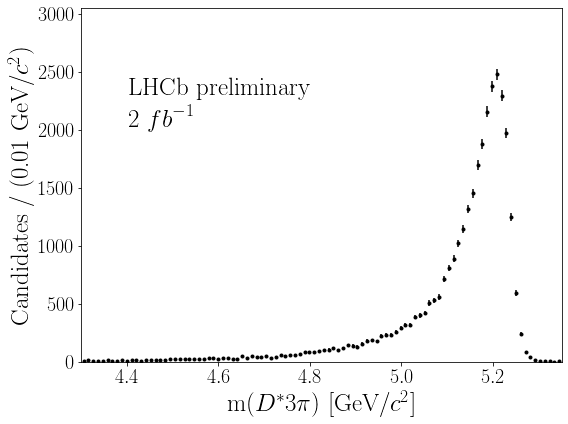

In [7]:
h.plot_hist_particle({name_data:df}, var, n_bins = 100, name_folder = name_data, colors='black', mode_hist=False,
                      low=low, high=high, pos_text_LHC=[0.1,0.8,'left'])

## Two opposed Crystall ball Fit

In [8]:
obs = zfit.Space("x", limits=(low, high))

In [9]:
# name        value    minuit_hesse         minuit_minos    at limit
# --------  -------  --------------  -------------------  ----------
# fraction   0.8774     +/-   0.014  -  0.014   +  0.024       False
# alphaL     0.2519     +/-  0.0088  -  0.017   +  0.023       False
# muL         5.214     +/- 0.00059  - 0.0013   + 0.0011       False
# nL          4.566     +/-    0.18  -   0.27   +   0.18       False
# sigmaL    0.02086     +/- 0.00051  -0.00051   + 0.0011       False
# alphaR     -2.505     +/-     4.4  -    3.7   +    3.7       False
# muR         5.183     +/-   0.003  - 0.0045   +  0.003       False
# nR          46.42     +/- 3.4e+03  -     51   +     51       False
# sigmaR    0.04053     +/-  0.0024  - 0.0026   + 0.0024       False

muL = zfit.Parameter("muL", 5.2, 5.15, 5.23)
muR = zfit.Parameter("muR", 5.2, 5.15, 5.23)

sigmaL = zfit.Parameter("sigmaL", 0.02, 0.01, 0.1)
sigmaR = zfit.Parameter("sigmaR", 0.04, 0.01, 0.1)

alphaL = zfit.Parameter("alphaL", 0.3, 0.01, 2.)
alphaR = zfit.Parameter("alphaR", -1.8, -5., -0.1)

nL = zfit.Parameter("nL", 4., 0.1, 10.)
nR = zfit.Parameter("nR", 45., 1., 60.)

frac = zfit.Parameter("fraction", 0.9, 0, 3.) # fraction between L and R

In [10]:
# doubleCB = zfit.pdf.DoubleCB(mu, sigma, alphaL, alphaR, nL, nR, obs=obs)

crystalBallL = zfit.pdf.CrystalBall(muL, sigmaL, alphaL, nL, obs=obs)
crystalBallR = zfit.pdf.CrystalBall(muR, sigmaR, alphaR, nR, obs=obs)
# gaussianR = zfit.pdf.Gauss(muR, sigmaR, obs=obs)

model = zfit.pdf.SumPDF([crystalBallL, crystalBallR], fracs=frac) # crystalBallR is multiplied by fracs

data = zfit.Data.from_pandas(df[var],obs=obs)

In [11]:
result, params = launch_fit(model, data) # I performed 2 fits for the last fit to converge ...
result, params = launch_fit(model, data) 

------------------------------------------------------------------
| FCN = -3.32e+04               |     Ncalls=686 (697 total)     |
| EDM = 0.000479 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     False     |     True      |   True    |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   False   |   True    | False  |
------------------------------------------------------------------
name        value    minuit_hesse    at limit
--------  -------  --------------  ----------
fraction   0.8773     +/-  0.0081       False
alphaL     0.2518     +/-  0.0031       False
muL         

Info in matrix forced pos-def by adding to diagonal : padd = 0.269003
Info: MnHesse: matrix was forced pos. def. 
Info: VariableMetricBuilder: Tolerance is not sufficient, continue the minimization
Info in Current  Edm is : edm = 0.00424142
Info in Required Edm is : edmval = 0.001
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 0.0253087
Info in             requested : edmval = 0.001
Info: VariableMetricBuilder: FunctionMinimum is invalid after second try


    ------------------------------------------------------------------
    | FCN = -3.32e+04               |     Ncalls=134 (134 total)     |
    | EDM = 0.000102 (Goal: 0.001)  |            up = 0.5            |
    ------------------------------------------------------------------
    |  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
    ------------------------------------------------------------------
    |     True      |     True      |   False   |       False        |
    ------------------------------------------------------------------
    | Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
    ------------------------------------------------------------------
    |     False     |     True      |   True    |   True    | False  |
    ------------------------------------------------------------------
    name        value    minuit_hesse         minuit_minos    at limit
    --------  -------  --------------  -------------------  ----------
    fraction   0.8773     +/-   0.019  -  0.019   +  0.024       False
    alphaL     0.2518     +/-   0.019  -  0.017   +  0.019       False
    muL         5.214     +/-  0.0012  - 0.0012   + 0.0011       False
    nL          4.565     +/-    0.29  -   0.27   +    0.3       False
    sigmaL    0.02085     +/- 0.00085  -0.00077   + 0.0011       False
    alphaR     -2.509     +/-     1.5  -    1.4   +   0.66       False
    muR         5.183     +/-  0.0031  - 0.0031   + 0.0027       False
    nR          44.82     +/-   1e+03  -     44   +     50       False
    sigmaR    0.04054     +/-  0.0017  - 0.0026   + 0.0017       False


/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:503: UserWarning: The function <function Space.limits at 0x7f0bfd356560> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/plot/fit.py:32: UserWarning: The function <function Space.area at 0x7f0bfd35c950> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[4.3]]), array([[5.35]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


Number of d.o.f. in the model:  9
Reduced chi2:  1.2708672218690749


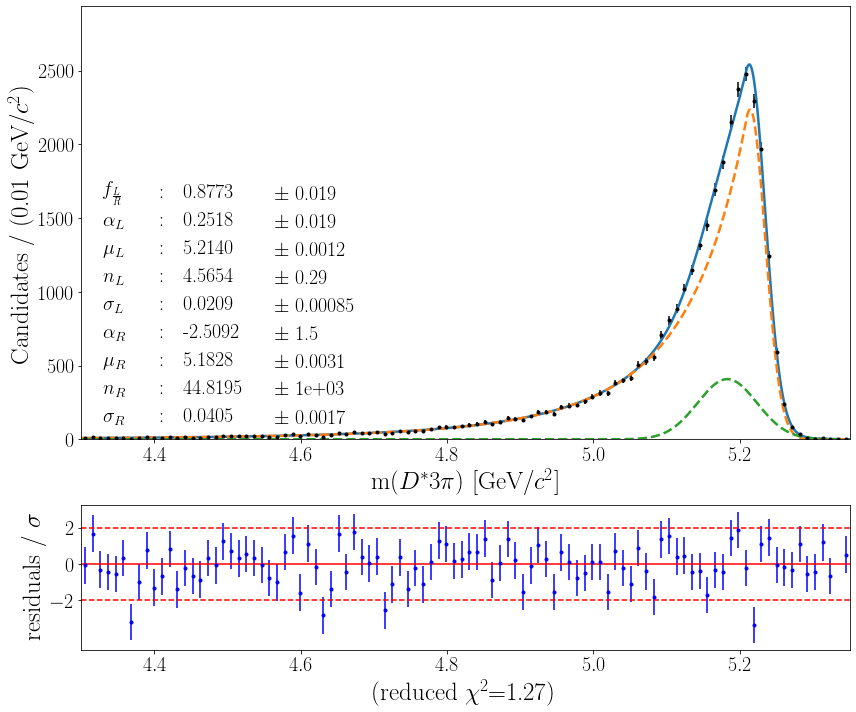

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_2/B0_M_Tau_Pi12pip_data_KPiPi_2_details_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='m($D^{*}3\\pi$) [GeV/$c^2$]', ylabel='Candidates / (0.01 GeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=1.27)', ylabel='residuals / $\\sigma$'>)

In [12]:
plot_hist_fit_particle(df, var, models = [model, crystalBallL, crystalBallR], obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data, type_models= 'mss', loc_res='lower left',
                       name_data = name_data+'_details', params=params, name_params=name_params_KPiPi, show_chi2=True)   

Number of d.o.f. in the model:  9
Reduced chi2:  1.2708672218690749


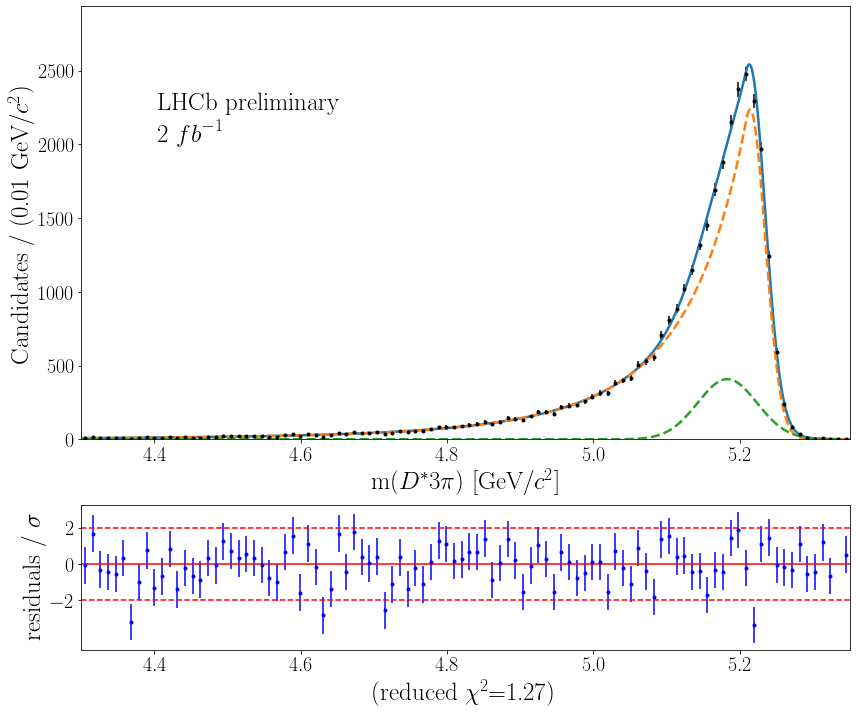

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/data_KPiPi_2/B0_M_Tau_Pi12pip_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='m($D^{*}3\\pi$) [GeV/$c^2$]', ylabel='Candidates / (0.01 GeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=1.27)', ylabel='residuals / $\\sigma$'>)

In [15]:
plot_hist_fit_particle(df, var, models = [model, crystalBallL, crystalBallR], obs=obs, n_bins = 100,mode_hist = False,
                       name_folder = name_data, type_models= 'mss', loc_res='lower left',
                       show_chi2=True, pos_text_LHC=[0.1, 0.8, 'left'])   

In [22]:
save_params(params, name_data, True, 'data_KPiPi')

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/data_KPiPi_2_params.json


In [4]:
json_to_latex_table(name_data, 'data_KPiPi', name_params_KPiPi)

/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/data_KPiPi/data_KPiPi_2_params.tex
/afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/data_KPiPi/data_KPiPi_2_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\alpha_L$&$0.252\pm0.019$\\
\hline
$\alpha_R$&$-2.5\pm1.5$\\
\hline
$f_{\frac{L}{R}}$&$0.877\pm0.019$\\
\hline
$\mu_L$&$5.2140\pm0.0012$\\
\hline
$\mu_R$&$5.1828\pm0.0031$\\
\hline
$n_L$&$4.57\pm0.29$\\
\hline
$n_R$&$(0.0\pm1.0)\times 10^3$\\
\hline
$\sigma_L$&$0.02085\pm0.00085$\\
\hline
$\sigma_R$&$0.0405\pm0.0017$\\
\hline
\end{tabular}
